In [1]:
#!! pip install pysort
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris = iris.sort_index()

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print(iris.shape)

(150, 5)


In [6]:
print(iris.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


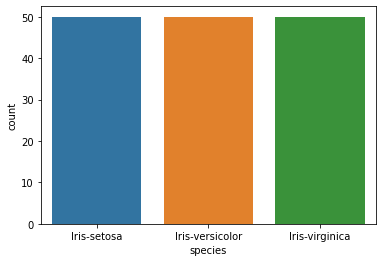

In [7]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import seaborn as sns
sns.countplot(iris['species'],label="Count")
plt.show()

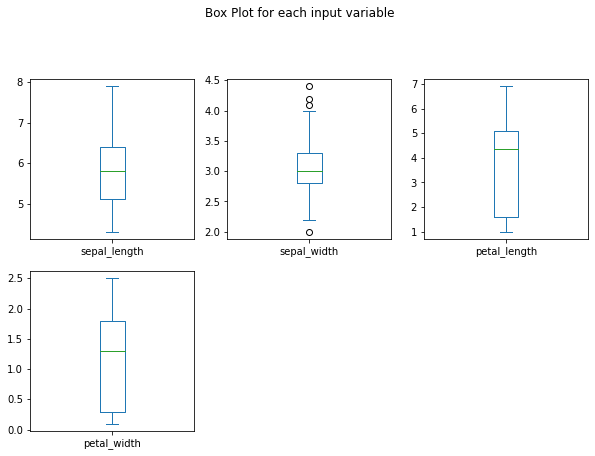

In [8]:
iris.drop('species', axis=1).plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,10), 
                                        title='Box Plot for each input variable')
plt.show()

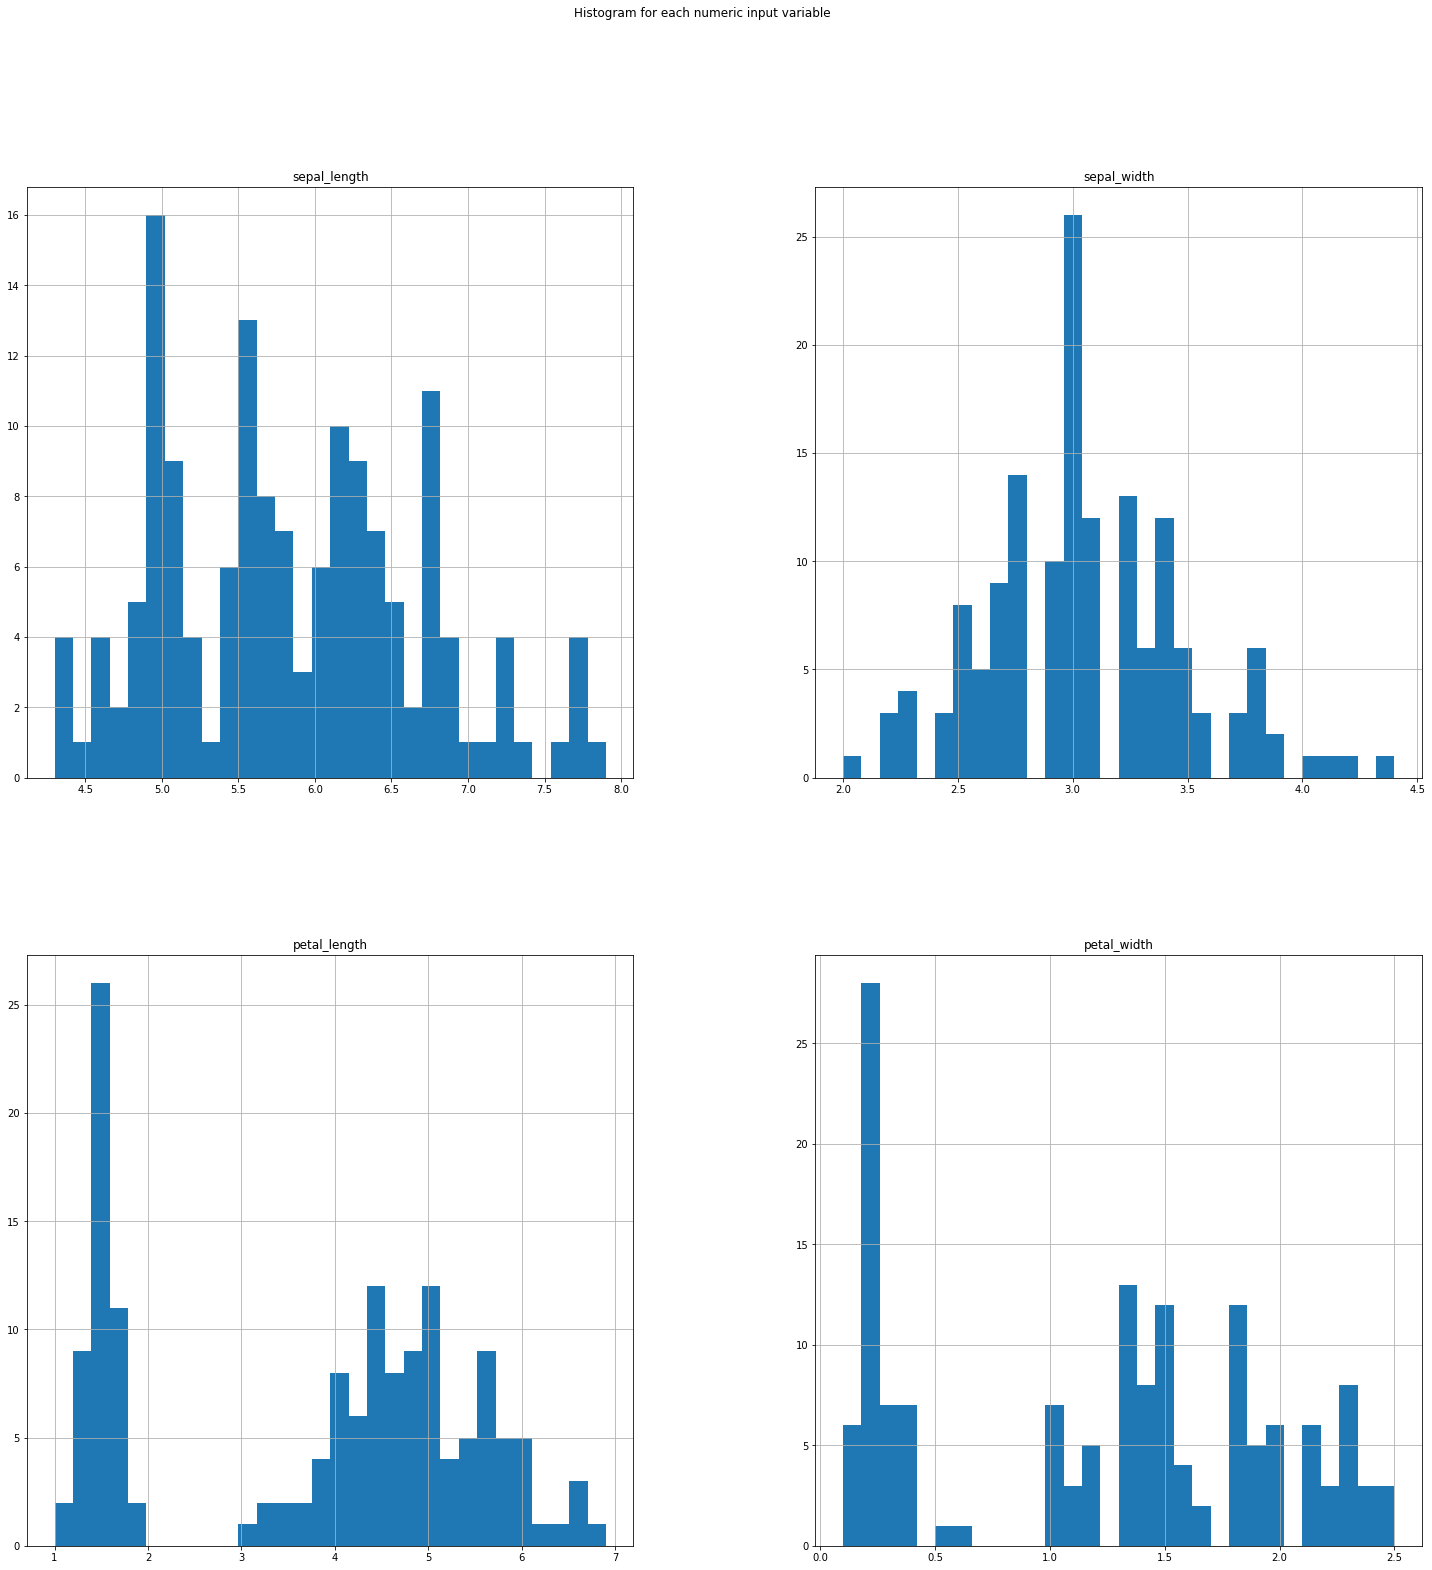

In [9]:
import pylab as pl
iris.drop('species' ,axis=1).hist(bins=30, figsize=(25,25))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

## Firefly Algorithm

In [10]:
import numpy
import math
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold,cross_val_score
        
def alpha_new(alpha, NGen):
    #calculate a new value of alpha
    delta = 1 - (10 ** (-4) / 0.9) ** (1 / NGen)
    alpha = (1 - delta) * alpha
    return alpha


def FFA(X_train,X_test,y_train,y_test, lb, ub, dim, n, MaxGeneration):

    # General parameters

    # n=50 #number of fireflies
    # dim=30 #dim
    # lb=-50
    # ub=50
    # MaxGeneration=10

    # FFA parameters
    alpha = 0.5  # Randomness 0--1 (highly random)
    betamin = 0.20  # minimum value of beta
    gamma = 1  # Absorption coefficient
    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim

    zn = numpy.ones(n)
    zn.fill(float("inf"))

    # Determining random locations for fireflies
    ns = numpy.zeros((n, dim))
    for i in range(dim):
        ns[:, i] = numpy.random.uniform(0, 1, n) * (ub[i] - lb[i]) + lb[i]
    Lightn = numpy.ones(n)
    Lightn.fill(float("inf"))

    
    convergence = []
    iterations = []
    accuracy = []
    array = []
    
    # Main loop
    t = 0 
    while t < MaxGeneration:
        for k in range(0, MaxGeneration):  #start iterations

            #This line of reducing alpha is optional
            alpha = alpha_new(alpha, MaxGeneration)
        
            kmeans = KMeans(n_clusters = i).fit(X_train,y_train)
            cv = KFold(n_splits = 10, shuffle = True, random_state = 15)
            cv_accuracies = cross_val_score(kmeans,  X_test, y_test, cv = cv,scoring = 'accuracy')


            accuracies = cv_accuracies.mean()            
            fitness_value = (1 - accuracies) * 100
            
            
            #Evaluate new solutions (for all n fireflies)
            for i in range(0, n):
                zn[i] = kmeans.predict(ns[i, :].reshape(1,-1))
                Lightn[i] = zn[i]

            #Ranking fireflies by their light intensity/objectives
            Lightn = numpy.sort(zn)
            Index = numpy.argsort(zn)
            ns = ns[Index, :]

            #Find the current best
            nso = ns
            Lighto = Lightn
            nbest = ns[0, :]
            Lightbest = Lightn[0]

            #For output only
            fbest = Lightbest
            convergence.append(fbest)
            array.append((100-fbest)/100)

            #Move all fireflies to the better locations
            #  [ns]=ffa_move(n,d,ns,Lightn,nso,Lighto,nbest,...
            #    Lightbest,alpha,betamin,gamma,Lb,Ub);
            scale = []
            for b in range(dim):
                scale.append(abs(ub[b] - lb[b]))
            scale = numpy.array(scale)
            for i in range(0, n):
                #The attractiveness parameter beta=exp(-gamma*r)
                for j in range(0, n):
                    r = numpy.sqrt(numpy.sum((ns[i, :] - ns[j, :]) ** 2)) #Distance formula
                    #r=1
                    #Update moves
                    if Lightn[i] > Lighto[j]:  #Brighter and more attractive
                        beta0 = 1
                        beta = (beta0 - betamin) * math.exp(-gamma * r ** 2) + betamin
                        tmpf = alpha * (numpy.random.rand(dim) - 0.5) * scale
                        ns[i, :] = ns[i, :] * (1 - beta) + nso[j, :] * beta + tmpf

        t = t + 1
        iterations.append(t)
        accuracy.append((100-fbest)/100)
        

        IterationNumber = k
        BestQuality = fbest

        
        newArray = []
        newArray = array

        from sorting_techniques import pysort
        sortObj = pysort.Sorting()
        sortResult = sortObj.bubbleSort(newArray)

        print(sortResult) 
        
        if array[k] == sortResult[-1]:

            print("At iteration is: " + str(k+1) , "the best fitness is " + str(BestQuality))
            print('accuracy:',sortResult[-1])
            break 
        else:
            print(array[k], sortResult[-1])

    return IterationNumber,BestQuality,sortResult[-1]

## Kmeans

In [11]:
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()
iris.species = encode.fit_transform(iris.species)

In [12]:
X = iris.drop('species',axis = 1)
y = iris.species

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X, y, test_size = 0.5, random_state = 0)

In [15]:
IterationNumber,BestQuality,accuracy = FFA(X_train,X_test,y_train,y_test,-50,50,4,50,10)

[0.87, 0.87, 0.88, 0.89, 0.89, 0.89, 0.9, 0.9, 0.91, 1.0]
At iteration is: 10 the best fitness is 12.0
accuracy: 1.0


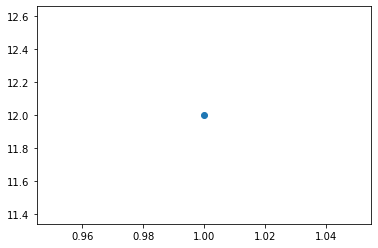

In [16]:
import matplotlib.pyplot as plt
plt.scatter(accuracy,BestQuality)

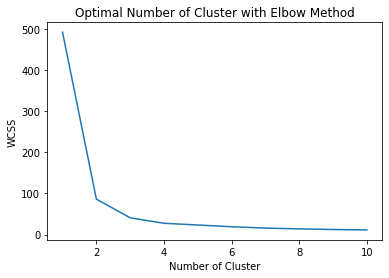

In [17]:
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)

X = iris.iloc[:,[1,2]].values
from sklearn.cluster import KMeans
wcss = [] 
number_of_cluster_list = range(1, 11)
for i in number_of_cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(number_of_cluster_list, wcss)
plt.title('Optimal Number of Cluster with Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [18]:
#n_clusters = 3 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print([y_kmeans])

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1])]


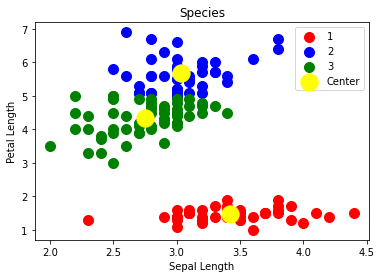

In [19]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = '3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Center')
plt.title('Species')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 10).fit(X_train,y_train)

In [21]:
y_pred = kmeans.predict(X_train)

In [22]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 30)
accuracies = cross_val_score(kmeans, X , y , cv = cv)
accuracy_mean = accuracies.mean()
print(accuracy_mean)
accuracy_std = accuracies.std() * 100
print(accuracy_std)

-1.6114514708511685
47.41261757739401
